## MERCK Data Discovery Project - Malavikha Sudarshan #

In [1]:
import numpy as np

import pandas as pd
# from pandas.api.types import CategoricalDtype

# %matplotlib inline
import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn import linear_model as lm

# import warnings
# warnings.filterwarnings("ignore")

# import zipfile
# import os
# import subprocess
import glob

In [7]:
#lst = !ls *.gz
lst = glob.glob("*.csv.gz")
print(lst)

df = pd.concat((pd.read_csv(l, compression="gzip", sep=",", skiprows=1) for l in lst), ignore_index = True)

['1287165_1_Paired_All.csv.gz', '1287196_1_Paired_All.csv.gz', 'SRR9179280_paired.csv.gz', 'SRR9179297_paired.csv.gz', '1287197_1_Paired_All.csv.gz', '1287164_1_Paired_All.csv.gz', 'SRR9179293_paired.csv.gz', 'ERR4082275_paired.csv.gz', 'SRR9179284_paired.csv.gz', 'SRR10358523_paired.csv.gz', 'SRR9179274_paired.csv.gz', '1287167_1_Paired_All.csv.gz', '1287194_1_Paired_All.csv.gz', '1287195_1_Paired_All.csv.gz', '1287166_1_Paired_All.csv.gz', 'ERR4082291_paired.csv.gz', 'SRR9179277_paired.csv.gz', '1287179_1_Paired_All.csv.gz', '1287160_1_Paired_All.csv.gz', '1287193_1_Paired_All.csv.gz', '1287178_1_Paired_All.csv.gz', 'SRR9179273_paired.csv.gz', '1287192_1_Paired_All.csv.gz', '1287161_1_Paired_All.csv.gz', '1287162_1_Paired_All.csv.gz', '1287191_1_Paired_All.csv.gz', '1287188_1_Paired_All.csv.gz', 'SRR9179294_paired.csv.gz', '1279059_1_Paired_All.csv.gz', 'SRR9179283_paired.csv.gz', 'SRR10358524_paired.csv.gz', '1287190_1_Paired_All.csv.gz', '1287163_1_Paired_All.csv.gz', 'SRR9179287_p

/var/folders/pm/7ykmdfh54tndbkghdcjn63vh0000gn/T/ipykernel_38147/11984860.py:5: DtypeWarning: Columns (109,125,126,127,128,155,191) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(l, compression="gzip", sep=",", skiprows=1) for l in lst), ignore_index = True)
/var/folders/pm/7ykmdfh54tndbkghdcjn63vh0000gn/T/ipykernel_38147/11984860.py:5: DtypeWarning: Columns (109,125,126,127,128,155,191) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(l, compression="gzip", sep=",", skiprows=1) for l in lst), ignore_index = True)
/var/folders/pm/7ykmdfh54tndbkghdcjn63vh0000gn/T/ipykernel_38147/11984860.py:5: DtypeWarning: Columns (109,125,126,127,128,155,191) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat((pd.read_csv(l, compression="gzip", sep=",", skiprows=1) for l in lst), ignore_index = True)


In [3]:
df.head()

,sequence_id_heavy,sequence_heavy,locus_heavy,stop_codon_heavy,vj_in_frame_heavy,v_frameshift_heavy,productive_heavy,rev_comp_heavy,complete_vdj_heavy,v_call_heavy,...,cdr3_end_light,np1_light,np1_length_light,np2_light,np2_length_light,c_region_light,Isotype_light,Redundancy_light,ANARCI_numbering_light,ANARCI_status_light
0,AAACCTGAGAACTCGG-1_contig_2,GGCTTTCTGAGAGTCATGGACCTCCTGCACAAGAACATGAAACACC...,H,F,T,F,T,F,T,IGHV4-34*01,...,411.0,NaN,0.0,NaN,NaN,GTCAGCCCAAGGCTGCCCCCTCGGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'S', '3 ': 'V', '4 ...",|||||
1,AAACCTGAGATATGGT-1_contig_2,AGCTCTGGGAGAGGAGCTCCAGCCTTGGGATTCCCAGCTGTCTCCA...,H,F,T,F,T,F,T,IGHV3-73*02,...,404.0,GCTGC,5.0,NaN,NaN,GTCAGCCCAAGGCTGCCCCCTCGGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'S', '3 ': 'V', '4 ...",|||||
2,AAACCTGAGATGTCGG-1_contig_2,TGGGGACCCAAAAACCACACCCCTCCTTGGGAGAATCCCCTAGATC...,H,F,T,F,T,F,T,IGHV1-18*01,...,388.0,NaN,0.0,NaN,NaN,GTCAGCCCAAGGCTGCCCCCTCGGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'S', '2 ': 'S', '3 ': 'E', '4 ...",|||||
3,AAACCTGAGCACCGTC-1_contig_2,ACCCAAAAACCACACCCCTCCTTGGGAGAATCCCCTAGATCACAGC...,H,F,T,F,T,F,T,IGHV1-18*01,...,398.0,NaN,0.0,NaN,NaN,GAACTGTGGCTGCACCATCTGTCTTCATCTTCCCGCCATCTGATGA...,Bulk,1.0,"{'fwk1': {'1 ': 'E', '2 ': 'I', '3 ': 'V', '4 ...",|||||
4,AAACCTGAGCGTAATA-1_contig_2,AGCTCTGGGAGAGGAGCCCCAGCCGTGAGATTCCCAGGAGTTTCCA...,H,F,T,F,T,F,T,IGHV3-49*04,...,385.0,NaN,0.0,NaN,NaN,GTCAGCCCAACGCTGCCCCCTCGGTCACTCTGTTCCCGCCCTCCTC...,Bulk,1.0,"{'fwl1': {'1 ': 'Q', '2 ': 'L', '3 ': 'V', '4 ...",|||||


In [4]:
df.size

311336388

In [5]:
df.columns

Index(['sequence_id_heavy', 'sequence_heavy', 'locus_heavy',
       'stop_codon_heavy', 'vj_in_frame_heavy', 'v_frameshift_heavy',
       'productive_heavy', 'rev_comp_heavy', 'complete_vdj_heavy',
       'v_call_heavy',
       ...
       'cdr3_end_light', 'np1_light', 'np1_length_light', 'np2_light',
       'np2_length_light', 'c_region_light', 'Isotype_light',
       'Redundancy_light', 'ANARCI_numbering_light', 'ANARCI_status_light'],
      dtype='object', length=198)

In [6]:
for col in df.columns:
    print(col)

sequence_id_heavy
sequence_heavy
locus_heavy
stop_codon_heavy
vj_in_frame_heavy
v_frameshift_heavy
productive_heavy
rev_comp_heavy
complete_vdj_heavy
v_call_heavy
d_call_heavy
j_call_heavy
sequence_alignment_heavy
germline_alignment_heavy
sequence_alignment_aa_heavy
germline_alignment_aa_heavy
v_alignment_start_heavy
v_alignment_end_heavy
d_alignment_start_heavy
d_alignment_end_heavy
j_alignment_start_heavy
j_alignment_end_heavy
v_sequence_alignment_heavy
v_sequence_alignment_aa_heavy
v_germline_alignment_heavy
v_germline_alignment_aa_heavy
d_sequence_alignment_heavy
d_sequence_alignment_aa_heavy
d_germline_alignment_heavy
d_germline_alignment_aa_heavy
j_sequence_alignment_heavy
j_sequence_alignment_aa_heavy
j_germline_alignment_heavy
j_germline_alignment_aa_heavy
fwr1_heavy
fwr1_aa_heavy
cdr1_heavy
cdr1_aa_heavy
fwr2_heavy
fwr2_aa_heavy
cdr2_heavy
cdr2_aa_heavy
fwr3_heavy
fwr3_aa_heavy
fwr4_heavy
fwr4_aa_heavy
cdr3_heavy
cdr3_aa_heavy
junction_heavy
junction_length_heavy
junction_aa_h

In [7]:
df.loc[1, 'sequence_alignment_aa_light']

#each letter corresponds to an amino acid

'QSVVTQPPSASGTPGQTVTISCSGSSSNIGRGSVCWYQQLSGMAPKLLNYNNDQRPSGVPDRFSGSLSGTSASLAISGLQSEDEADYYCAVWDDSLAAWVFGGGTKLTVL'

In [8]:
len(df.loc[1, 'sequence_alignment_aa_light'])

#not necessarily divisible by three to give an integer

110

In [9]:
#function to split sequence into codons - each three letter sequence forms an amino acid

def count_aa(row_i, attribute):
    return len(df.loc[row_i, attribute]) #/3
    
count_aa(1, 'sequence_alignment_aa_light')

110

In [10]:
sq_light = []
for i in df.index:
    sq_light.append(count_aa(i, 'sequence_alignment_aa_light'))
sq_light = pd.Series(sq_light)

sq_light

0          111
1          110
2          107
3          108
4          111
          ... 
1572401    112
1572402    107
1572403    107
1572404    107
1572405    107
Length: 1572406, dtype: int64

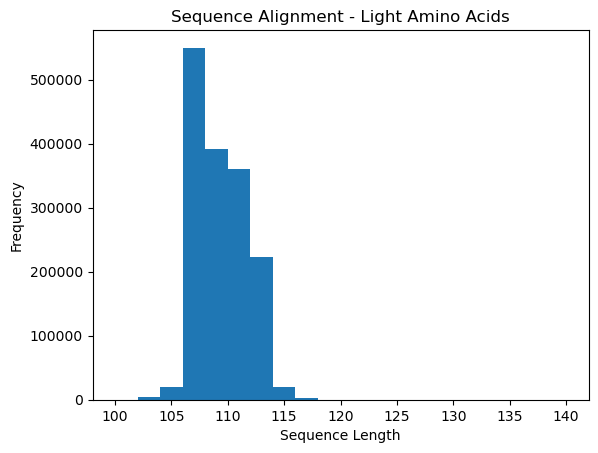

In [11]:
plt.hist(sq_light, bins = 20, range=[100, 140])
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.title("Sequence Alignment - Light Amino Acids")
plt.show()

#skewed to the right slightly

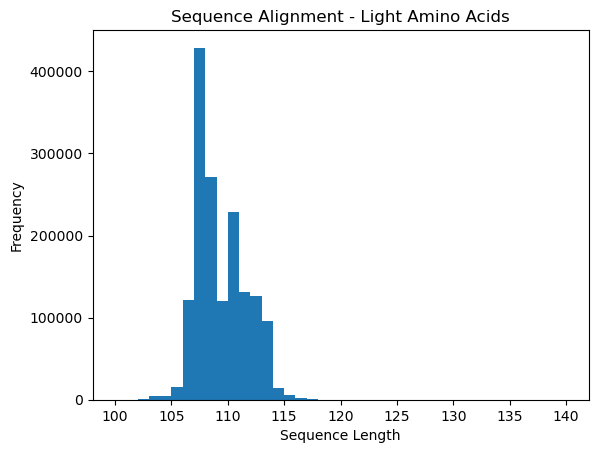

In [12]:
plt.hist(sq_light, bins = 40, range=[100, 140])
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.title("Sequence Alignment - Light Amino Acids")
plt.show()

In [13]:
#explore all of these files, put them in dataframes and count

# extract sequences from all of these gz files, append them into one huge df

#count number of amino acids in a sequence per row using a function. 

#count length
#plot in a histogram. x-axis length, y-axis frequency, expect a normal distribution with outliers

#cdr3_start_light for the beginning of the chain. 
#cdr3_end_light; these will have varying lengths

#look at other columns too

#batch effects, some of these are from different studies

In [11]:
df.loc[:, 'sequence_alignment_aa_heavy']

0          QVQLQQWGAGLLKPSETLSLTCAVYGGSFSGYYWSWIRQPPGKGLE...
1          EVQLVESGGGLVQPGGSLKLSCAASGFTFSGSAIHWVRQASGKGLE...
2          QVQLVQSGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...
3          QVQLVQSGAEVKKPGASVKVSCKASGYTFADYGISWVRQAPGQGLE...
4          EVQLVESGGGLVQPGRSLRLSCIGSGFTFSNYAINWVRQAPGKGLE...
                                 ...                        
1572401    EVQLVESGGGLVQPGRSLKLSCAASGFTFSNYYMAWVRQAPKKGLE...
1572402    EVQLVESGGGLVQPGASLKLSCVASGFTFSDYWMSWVRQTPGKTME...
1572403    EVQLVETGGGLVQPGNSLKLSCATSGFTFSTAWMNWIRQTPGKRLE...
1572404    QVQLKESGPGLVQPSETLSLTCTVSGFSLTSNSVHWVRQPPGKGLE...
1572405    QVQLKESGPGLVQPSQTLSLTCTVSGFSLTSNSVHWVRQPPGKGLE...
Name: sequence_alignment_aa_heavy, Length: 1572406, dtype: object

In [15]:
#repeat all of the operations in cell 16 for this col

#figure out which columns are most impactful - most significant features. some may be linearly dependent



In [16]:
sq_heavy = []
for i in df.index:
    sq_heavy.append(count_aa(i, 'sequence_alignment_aa_heavy'))
sq_heavy = pd.Series(sq_heavy)

sq_heavy

0          139
1          122
2          116
3          123
4          122
          ... 
1572401    116
1572402    119
1572403    122
1572404    126
1572405    118
Length: 1572406, dtype: int64

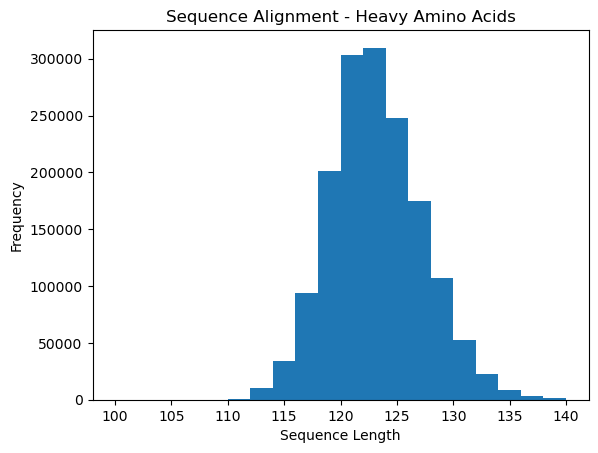

In [17]:
plt.hist(sq_heavy, bins = 20, range=[100, 140])
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.title("Sequence Alignment - Heavy Amino Acids")
plt.show()

#mean of sequence length is more to the right, overall longer sequences in comparison to the light sequenced amino 

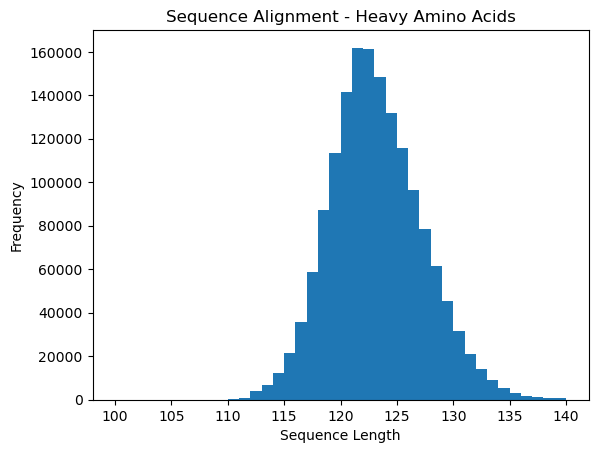

In [18]:
plt.hist(sq_heavy, bins = 40, range=[100, 140])
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.title("Sequence Alignment - Heavy Amino Acids")
plt.show()


## Ablang and ProteinBERT - Protein Embedding using language models

In [ ]:
import ablang
import tensorflow

In [10]:
heavy_ablang = ablang.pretrained("heavy")
heavy_ablang.freeze()

In [12]:
seqs_heavy = df.loc[1, 'sequence_alignment_aa_heavy']

seqcodings = heavy_ablang(seqs_heavy, mode='seqcoding')
print("-"*100)
print("The output shape of the heavy seq-codings:", seqcodings.shape)
print("-"*100)

print(seqcodings)

----------------------------------------------------------------------------------------------------
The output shape of the heavy seq-codings: (1, 768)
----------------------------------------------------------------------------------------------------
[[-5.15204049e-01  1.86946855e-02  4.57342742e-02  2.66064099e-01
  -3.91621487e-01  4.45148899e-01  1.30301931e-01  1.64446585e-01
  -2.21697543e-01 -1.14347810e-01 -5.25753608e-02 -1.41367518e-01
  -8.59705235e-01  4.69719728e-02 -6.09022336e-02  2.55044980e-01
   3.48898723e-01  9.58714071e-02 -1.96482236e-01  2.70695425e-01
  -6.91633213e-02  1.22867902e-01  2.43296610e-01  2.04761738e-01
  -5.96459591e-02 -7.96323192e-02  7.51844865e-01  7.88036273e-01
  -2.75091369e-01 -8.98167559e-01  1.53827656e-01  1.79695818e-01
   5.32633375e-01 -5.34723764e-01  9.86848550e-01 -3.20551729e-01
  -6.82349197e-01 -3.02567581e-01 -1.72233566e-01 -8.15064523e-01
   4.54509360e-01  1.65647069e-01  1.94579369e-01  1.46949613e-01
   2.45111824e-01  2

In [13]:
light_ablang = ablang.pretrained("light")
light_ablang.freeze()

x amodel.pt
x hparams.json
x vocab.json


In [16]:
seqs_light = df.loc[1:5, 'sequence_alignment_aa_light']

seqcodings = light_ablang(seqs_light, mode='seqcoding')
print("-"*100)
print("The output shape of the light seq-codings:", seqcodings.shape)
print("-"*100)

print(seqcodings)

----------------------------------------------------------------------------------------------------
The output shape of the light seq-codings: (5, 768)
----------------------------------------------------------------------------------------------------
[[-0.77981808  0.52742334 -1.01749978 ... -1.00904337  0.52656486
   0.59242644]
 [-0.69263235  1.39279804 -1.16059907 ... -0.24491818  0.85339339
   0.60039475]
 [-0.55365255  0.51846467 -0.65653344 ...  0.64035633  0.74914241
   0.74329742]
 [-0.50022303 -0.23523529 -0.23697622 ... -0.02761334 -0.06704977
   0.94365821]
 [-0.76195578  1.41742547 -1.39856508 ... -0.43760041  1.1830603
   0.9802342 ]]


**ProteinBERT

In [1]:
import torch
from protein_bert_pytorch import ProteinBERT

model = ProteinBERT(
    num_tokens = 21,
    num_annotation = 8943,
    dim = 512,
    dim_global = 256,
    depth = 6,
    narrow_conv_kernel = 9,
    wide_conv_kernel = 9,
    wide_conv_dilation = 5,
    attn_heads = 8,
    attn_dim_head = 64
)

seq = torch.randint(0, 21, (2, 2048))
mask = torch.ones(2, 2048).bool()
annotation = torch.randint(0, 1, (2, 8943)).float()

seq_logits, annotation_logits = model(seq, annotation, mask = mask) # (2, 2048, 21), (2, 8943)

In [ ]:
import torch
from protein_bert_pytorch import ProteinBERT, PretrainingWrapper

model = ProteinBERT(
    num_tokens = 21,
    num_annotation = 8943,
    dim = 512,
    dim_global = 256,
    depth = 6,
    narrow_conv_kernel = 9,
    wide_conv_kernel = 9,
    wide_conv_dilation = 5,
    attn_heads = 8,
    attn_dim_head = 64,
    local_to_global_attn = False,
    local_self_attn = True,
    num_global_tokens = 2,
    glu_conv = False
)

learner = PretrainingWrapper(
    model,
    random_replace_token_prob = 0.05,    # what percentage of the tokens to replace with a random one, defaults to 5% as in paper
    remove_annotation_prob = 0.25,       # what percentage of annotations to remove, defaults to 25%
    add_annotation_prob = 0.01,          # probability to add an annotation randomly, defaults to 1%
    remove_all_annotations_prob = 0.5,   # what percentage of batch items to remove annotations for completely, defaults to 50%
    seq_loss_weight = 1.,                # weight on loss of sequence
    annotation_loss_weight = 1.,         # weight on loss of annotation
    exclude_token_ids = (0, 1, 2)        # for excluding padding, start, and end tokens from being masked
)

# do the following in a loop for a lot of sequences and annotations

seq        = torch.randint(0, 21, (2, 2048))
annotation = torch.randint(0, 1, (2, 8943)).float()
mask       = torch.ones(2, 2048).bool()

loss = learner(seq, annotation, mask = mask) # (2, 2048, 21), (2, 8943)
loss.backward()

# save your model and evaluate it

torch.save(model, './improved-protein-bert.pt')

In [ ]:
import os

import pandas as pd
from IPython.display import display

import tensorflow 
from tensorflow import keras

from proteinbert import OutputType, OutputSpec, FinetuningModelGenerator, load_pretrained_model, finetune, evaluate_by_len
from proteinbert.conv_and_global_attention_model import get_model_with_hidden_layers_as_outputs

In [1]:

# Loading the pre-trained model and fine-tuning it on the loaded dataset

pretrained_model_generator, input_encoder = load_pretrained_model()

# get_model_with_hidden_layers_as_outputs gives the model output access to the hidden layers (on top of the output)
model_generator = FinetuningModelGenerator(pretrained_model_generator, OUTPUT_SPEC, pretraining_model_manipulation_function = \
        get_model_with_hidden_layers_as_outputs, dropout_rate = 0.5)

training_callbacks = [
    keras.callbacks.ReduceLROnPlateau(patience = 1, factor = 0.25, min_lr = 1e-05, verbose = 1),
    keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True),
]

finetune(model_generator, input_encoder, OUTPUT_SPEC, train_set['seq'], train_set['label'], valid_set['seq'], valid_set['label'], \
        seq_len = 512, batch_size = 32, max_epochs_per_stage = 40, lr = 1e-04, begin_with_frozen_pretrained_layers = True, \
        lr_with_frozen_pretrained_layers = 1e-02, n_final_epochs = 1, final_seq_len = 1024, final_lr = 1e-05, callbacks = training_callbacks)


# Evaluating the performance on the test-set

results, confusion_matrix = evaluate_by_len(model_generator, input_encoder, OUTPUT_SPEC, test_set['seq'], test_set['label'], \
        start_seq_len = 512, start_batch_size = 32)

print('Test-set performance:')
display(results)

print('Confusion matrix:')
display(confusion_matrix)

NameError: name 'load_pretrained_model' is not defined